In [152]:
import numpy as np

In [153]:
X = np.random.rand(300, 1)
y = 5 + 6 * X + np.random.randn(300, 1)
y = y.reshape((300,))

In [154]:
X.shape, y.shape

((300, 1), (300,))

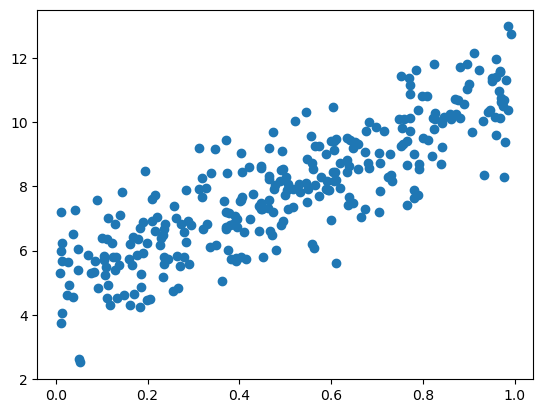

In [155]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [156]:
lr = 1e-1
N = 300
Beta = np.random.randn(2)
n_iter = 100
X_exp = np.concatenate((np.ones((300, 1)), X), axis=1)

In [157]:
%reload_ext autoreload
%autoreload 2

from gradient_descent import batch_gradient_descent

In [158]:
betas, losses = batch_gradient_descent(X_exp, y, lr, n_iter, beta=Beta)

In [159]:
import matplotlib.pyplot as plt

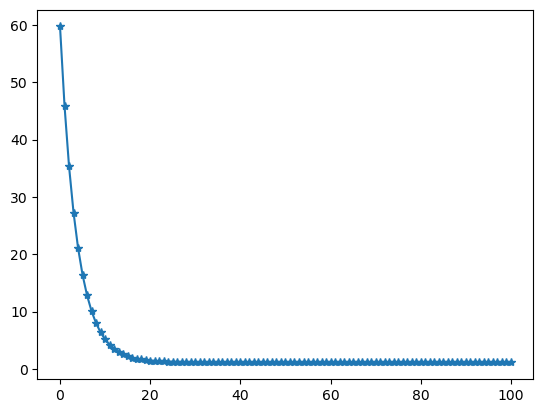

In [160]:
plt.plot(losses, marker="*")